In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# <span style = "color:olive;">Data cleansing</span>
## is a process of detecting and rectifying (or deleting) of untrustworthy, inaccurate or outdated information from a data set, archives, table, or database.
## <span style = "color:olive;">You’ll learn techniques on how to find and clean:</span>
- Missing Data
- Irregular Data (Outliers)
- Unnecessary Data — Repetitive Data, Duplicates and more

## we use the [California Housing Prices](https://www.kaggle.com/camnugent/california-housing-prices) from Kaggle.
About this file
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [3]:
df = pd.read_csv("../input/california-housing-prices/housing.csv")
print(df.shape)
print(df.dtypes)
df.head()

(20640, 10)
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value']


In [5]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['ocean_proximity']


# <span style = "color:olive;">Missing Data Heatmap</span>
## When there is a smaller number of features, we can visualize the missing data via heatmap.

<AxesSubplot:>

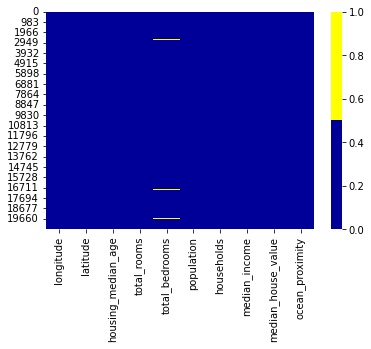

In [6]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

 the total_bedrooms feature only has little missing values around the 20640th row.

In [7]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


fill massing values in total_bedrooms with mean

In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

# <span style = "color:olive;">Irregular data (Outliers)</span>
## Outliers are data that is distinctively different from other observations. They could be real outliers or mistakes.

<AxesSubplot:>

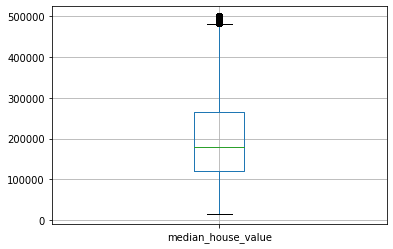

In [9]:
# box plot.

df.boxplot(column=['median_house_value'])

In [10]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

## The 500001 value is an outlier

In [11]:
df[df['median_house_value'] == 500001]['median_house_value'].count()

965

In [12]:
print((965/ 20640)*100)

4.675387596899225


## we have 4.6%  of value  500001 we can decide to remove it or not but I see this prcentage big to remove it effect on analysis.


# <span style = "color:olive;"> Unnecessary Data — Repetitive Data, Duplicates and more</span>
## remove households column

In [13]:
df =  df.drop(columns=['households'])

# References:
## - https://www.cloverdx.com/blog/data-cleansing-steps-better-data-health
## - https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d